In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys,caffe
%matplotlib inline


In [2]:
caffe_root='D:/caffe/'
os.chdir(caffe_root)
sys.path.insert(0,caffe_root+'python')

设置网络模型，并显示该模型中各层名称和参数的规模（注意此处是net.params, 而不是net.blobs)

In [3]:
net = caffe.Net(caffe_root + 'examples/cifar10/cifar10_quick_train_test.prototxt',
                caffe_root + 'examples/cifar10/cifar10_quick_iter_1000.caffemodel.h5',
                caffe.TEST)
#[(k, v[0]) for k, v in net.params.items()]
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1', (32L, 3L, 5L, 5L)),
 ('conv2', (32L, 32L, 5L, 5L)),
 ('conv3', (64L, 32L, 5L, 5L)),
 ('ip1', (64L, 1024L)),
 ('ip2', (10L, 64L))]

cifar10训练的模型配置在文件cifar10_quick_train_test.prototxt里面，共有三个卷积层和两个全连接层，参数规模如上所示。

In [5]:
#编写一个函数，用于显示各层的参数
def show_feature(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.imshow(data)
    plt.axis('off')

(32L, 3L, 5L, 5L)


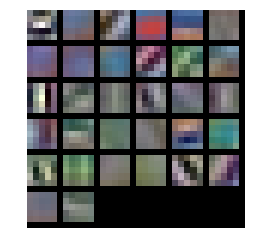

In [6]:
# 第一个卷积层，参数规模为(32,3,5,5)，即32个5*5的3通道filter
weight = net.params["conv1"][0].data
print weight.shape
show_feature(weight.transpose(0, 2, 3, 1))

参数有两种类型：权值参数和偏置项。分别用params["conv1"][0] 和params["conv1"][1] 表示 。
我们只显示权值参数，因此用params["conv1"][0] 

(32L, 32L, 5L, 5L)


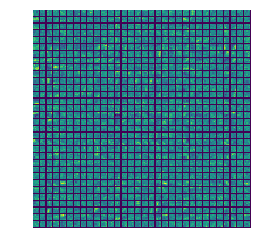

In [7]:
# 第二个卷积层的权值参数，共有32*32个filter,每个filter大小为5*5
weight = net.params["conv2"][0].data
print weight.shape
show_feature(weight.reshape(32**2, 5, 5))

(64L, 32L, 5L, 5L)


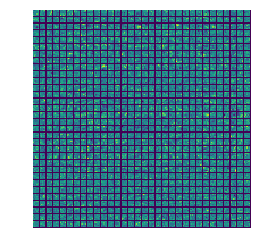

In [11]:
# 第三个卷积层的权值，共有64*32个filter,每个filter大小为5*5，取其前1024个进行可视化# 第三个卷积
weight = net.params["conv3"][0].data 
print weight.shape 
show_feature(weight.reshape(64*32, 5, 5)[:1024])